 # Определение перспективного тарифа для телеком-компании

Заказчик - компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  
В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**  
*Тариф «Смарт»*  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута);  
2. сообщение: 3 рубля;  
3. 1 Гб интернет-трафика: 200 рублей.  
*Тариф «Ультра»*  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
1. минута разговора: 1 рубль;  
2. сообщение: 1 рубль;  
3. 1 Гб интернет-трафика: 150 рублей.  
**Примечание:**  
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Цель исследования** — проверить две гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 

**Ход исследования**

Данные о поведении пользователей мы получили из файлов `/datasets/calls.csv`, `/datasets/internet.csv`, `/datasets/messages.csv`, `/datasets/tariffs.csv`, `/datasets/users.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Подготовка данных к анализу.  
 3. Анализ данных
 4. Проверка гипотез.

## Обзор данных

Составляем первое представление о данных

Импортируем библиотеки `pandas`, `matplotlib`, `numpy`, `scipy.stats` и `seaborn`:

In [ ]:
import pandas as pd                  # импорт библиотек
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

Настроим показ столбцов таблиц:

In [ ]:
pd.options.display.max_columns = 100 # настройка показа столбцов таблиц

Читаем файл users.csv и сохраняем его в переменной df_user:

In [ ]:
df_user = pd.read_csv('/datasets/users.csv') # чтение файла с данными и сохранение в переменную

Выведем на экран первые пять строк таблицы:

In [ ]:
df_user.head() # получение первых 5 строк таблицы

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Получаем общую информацию о таблице:

In [ ]:
df_user.info() # получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Итак, в таблице восемь столбцов. Тип данных в шести столбцах — object, в двух столбцах - int.

Согласно документации к данным:  
**Таблица users (информация о пользователях):**  
`user_id` — уникальный идентификатор пользователя  
`first_name` — имя пользователя  
`last_name` — фамилия пользователя  
`age` — возраст пользователя (годы)  
`reg_date` — дата подключения тарифа (день, месяц, год)  
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
`city` — город проживания пользователя  
`tarif` — название тарифного плана  

Пропущенные значения в колонке `churn_date` говорят о том, что тариф ещё действовал на момент выгрузки данных.

Проверим данные на наличие явных дубликатов:

In [ ]:
f'Количество дубликатов {df_user.duplicated().sum()}' # подсчёт явных дубликатов

'Количество дубликатов 0'

Проверим данные на наличие неявных дубликатов в колонке с названиями городов проживания пользователей.  
Для начала приведем все названия к нижнему регистру:

In [ ]:
df_user['city'] = df_user['city'].str.lower() # перевод строк в нижний регистр

In [ ]:
df_user['city'].sort_values().unique() # сортировка названий и вывод на экран уникальных значений

array(['архангельск', 'астрахань', 'балашиха', 'барнаул', 'белгород',
       'брянск', 'владивосток', 'владикавказ', 'владимир', 'волгоград',
       'волжский', 'вологда', 'воронеж', 'грозный', 'екатеринбург',
       'иваново', 'ижевск', 'иркутск', 'казань', 'калининград', 'калуга',
       'кемерово', 'киров', 'кострома', 'краснодар', 'красноярск',
       'курган', 'курск', 'липецк', 'магнитогорск', 'махачкала', 'москва',
       'мурманск', 'набережные челны', 'нижневартовск', 'нижний новгород',
       'нижний тагил', 'новокузнецк', 'новороссийск', 'новосибирск',
       'омск', 'оренбург', 'орёл', 'пенза', 'пермь', 'петрозаводск',
       'подольск', 'ростов-на-дону', 'рязань', 'самара',
       'санкт-петербург', 'саранск', 'саратов', 'севастополь', 'смоленск',
       'сочи', 'ставрополь', 'стерлитамак', 'сургут', 'тамбов', 'тверь',
       'тольятти', 'томск', 'тула', 'тюмень', 'улан-удэ', 'ульяновск',
       'уфа', 'хабаровск', 'химки', 'чебоксары', 'челябинск', 'череповец',
       'чи

Явные и неявные дубликаты не обнаружены.

Читаем файл calls.csv и сохраняем его в переменной df_call:

In [ ]:
df_call = pd.read_csv('/datasets/calls.csv') # чтение файла с данными и сохранение в переменную

Выведем на экран первые пять строк таблицы:

In [ ]:
df_call.head() # получение первых 5 строк таблицы

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Получаем общую информацию о таблице:

In [ ]:
df_call.info() # получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Итак, в таблице четые столбца. Тип данных в двух столбцах — object, в одном столбце - int и в одном - float. Пропусков в столбцах нет.

Согласно документации к данным:  
**Таблица calls (информация о звонках):**  
`id` — уникальный номер звонка  
`call_date` — дата звонка  
`duration` — длительность звонка в минутах  
`user_id` — идентификатор пользователя, сделавшего звонок 

Проверим, все ли пользователи делали звонки:

In [ ]:
len(df_call['user_id'].unique()) # подсчет количества пользователей

492

8 пользователей звонки не делали. Вероятно, звонки делали с другой сим-карты, а тариф Мегалайн использовали, например, для интернета.

Проверим данные на наличие явных дубликатов:

In [ ]:
f'Количество дубликатов {df_call.duplicated().sum()}' # подсчёт явных дубликатов

'Количество дубликатов 0'

Явные дубликаты не обнаружены.

Читаем файл internet.csv и сохраняем его в переменной df_net:

In [ ]:
df_net = pd.read_csv('/datasets/internet.csv')  # чтение файла с данными и сохранение в переменную

Выведем на экран первые пять строк таблицы:

In [ ]:
df_net.head() # получение первых 5 строк таблицы

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Получаем общую информацию о таблице:

In [ ]:
df_net.info() # получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Итак, в таблице пять столбцов. Тип данных в двух столбцах — object, в двух столбцах - int и в одном - float. Пропусков в столбцах нет, однако есть лишний столбец Unnamed: 0, который нужно будет удалить на этапе предобработки. 

Согласно документации к данным:  
**Таблица internet (информация об интернет-сессиях):**  
`id` — уникальный номер сессии  
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)  
`session_date` — дата интернет-сессии  
`user_id` — идентификатор пользователя  

Проверим, все ли пользователи пользовались интернетом:

In [ ]:
len(df_net['user_id'].unique()) # подсчет количества пользователей

497

3 пользователя интернетом не пользовались по тем или иным причинам.

Проверим данные на наличие явных дубликатов:

In [ ]:
f'Количество дубликатов {df_net.duplicated().sum()}' # подсчёт явных дубликатов

'Количество дубликатов 0'

Явные дубликаты не обнаружены.

Читаем файл messages.csv и сохраняем его в переменной df_mes:

In [ ]:
df_mes = pd.read_csv('/datasets/messages.csv')  # чтение файла с данными и сохранение в переменную

Выведем на экран первые пять строк таблицы:

In [ ]:
df_mes.head() # получение первых 5 строк таблицы

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Получаем общую информацию о таблице:

In [ ]:
df_mes.info() # получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Итак, в таблице три столбца. Тип данных в двух столбцах — object, в одном столбце - int. Пропусков в столбцах нет.

Согласно документации к данным:  
**Таблица messages (информация о сообщениях):**  
`id` — уникальный номер сообщения  
`message_date` — дата сообщения  
`user_id` — идентификатор пользователя, отправившего сообщение  

Проверим, все ли пользователи отправляли сообщения:

In [ ]:
len(df_mes['user_id'].unique()) # подсчет количества пользователей

426

74 пользователя сообщения не отправляли, вероятно, пользовались мессенджерами.

Проверим данные на наличие явных дубликатов:

In [ ]:
f'Количество дубликатов {df_mes.duplicated().sum()}' # подсчёт явных дубликатов

'Количество дубликатов 0'

Явные дубликаты не обнаружены.

Читаем файл tariffs.csv и сохраняем его в переменной df_tar:

In [ ]:
df_tar = pd.read_csv('/datasets/tariffs.csv')  # чтение файла с данными и сохранение в переменную

Выведем на экран таблицу:

In [ ]:
df_tar # выводим таблицу на экран

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Согласно документации к данным:    
**Таблица tariffs (информация о тарифах):**  
`tariff_name` — название тарифа  
`rub_monthly_fee` — ежемесячная абонентская плата в рублях  
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату  
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату  
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета  
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Вывод**  
Предварительно можно утверждать, что данных достаточно для нашего исследования, однако, мы выявили следующие проблемы в данных, которые будет необходимо устранить на этапе предобработки:

1. В таблицах df_tar и df_user колонки с названием тарифа называются по разному.
1. Неправильный формат даты.
2. Наличие лишнего столбца в таблице df_net.

## Подготовка данных к анализу

На этапе подготовки данных мы устраним проблемы в данных, выявленные на прошлом этапе, проверим данные на наличие выбросов и неправдоподобных значений, а также проведем расчет дополнительных параметров, необходимых для анализа и проверки гипотез.

### Переименование колонок

Переименуем колонку с названием тарифа в таблице df_tar, чтобы оно совпадало с названием аналогичной колонки в таблице df_user:

In [ ]:
df_tar = df_tar.rename({'tariff_name':'tariff'}, axis='columns') # переименование колонки

### Изменение типов данных

Переведем значения колонок с датами в соответствующий формат во всех таблицах:

In [ ]:
df_user['churn_date'] = pd.to_datetime(df_user['churn_date'], format = '%Y-%m-%d') # изменение типа данных

In [ ]:
df_user['reg_date'] = pd.to_datetime(df_user['reg_date'], format = '%Y-%m-%d') # изменение типа данных

In [ ]:
df_call['call_date'] = pd.to_datetime(df_call['call_date'], format = '%Y-%m-%d') # изменение типа данных

In [ ]:
df_net['session_date'] = pd.to_datetime(df_net['session_date'], format = '%Y-%m-%d') # изменение типа данных

In [ ]:
df_mes['message_date'] = pd.to_datetime(df_mes['message_date'], format = '%Y-%m-%d') # изменение типа данных

### Удаление лишнего столбца

Удалим лишний столбец Unnamed: 0 из таблицы df_net:

In [ ]:
df_net.drop('Unnamed: 0', axis = 1, inplace = True) # удаление столбца

### Поиск ошибок в данных и выбросов

Убедимся, что пользователи использовали только тарифы "Смарт" и "Ультра":

In [ ]:
df_user['tariff'].unique() # проверка уникальных значений в столбце с названиями тарифов

array(['ultra', 'smart'], dtype=object)

Проверим данны на наличие неправдоподобных значений и выбросов. Для этого построим гистограммы, диаграммы размаха и применим метод describe:

Изучим данные по продолжительности звонков:

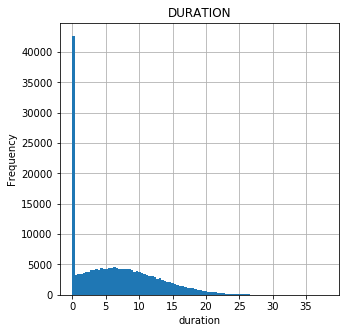

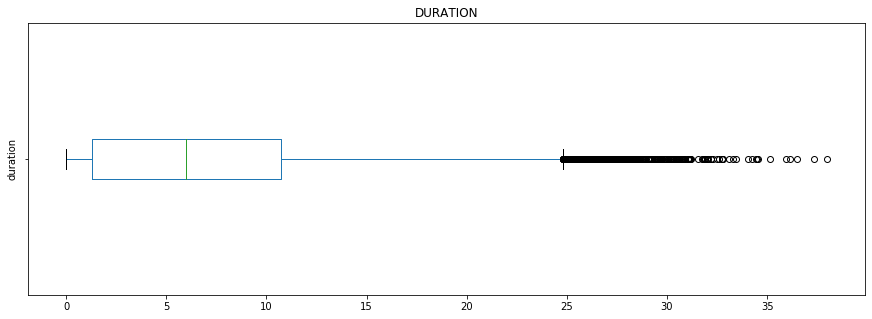

In [ ]:
# построение гистограммы и диаграммы размаха
df_call['duration'].plot(kind = 'hist', y = 'duration ', title = 'duration'.upper(), bins = 100, figsize = (5, 5), grid = True, zorder = 3)
plt.xlabel('duration')
plt.show()
df_call['duration'].plot(kind = 'box', y = 'duration', vert = 0, title = 'duration'.upper(), figsize = (15, 5), label = '')
plt.ylabel('duration')
plt.show()   

In [ ]:
df_call['duration'].describe() # изучение данных с помощью метода describe

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Имеется очень много звонков с нулевой продолжительностью, однако из документации мы знаем, что нулями обозначены пропущенные звонки, по этому эти данные - не ошибка.  
Максимальная продолжительность звонка - 38 минут, а среднее время 6,75 при медиане 6, что вполне правдоподобно. Данные совсем немного скошены вправо. 

Убедимся, что все звонки, интернет-сессии и сообщения были сделаны только в 2018 году:

In [ ]:
df_call['call_date'].describe() # изучение данных с помощью метода describe

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

In [ ]:
df_mes['message_date'].describe() # изучение данных с помощью метода describe

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

In [ ]:
df_net['session_date'].describe() # изучение данных с помощью метода describe

count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

Действительно, во всех таблицах имеются данные в промежутке между 01.01.2018 и 31.12.2018.

Изучим данные по интернет - трафику:

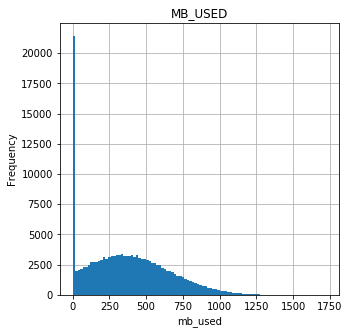

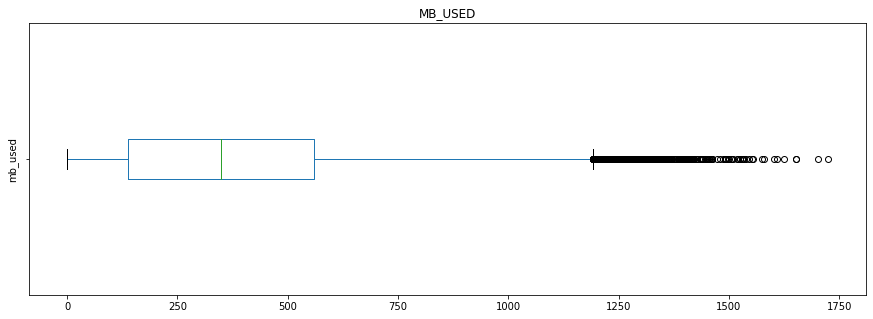

In [ ]:
# построение гистограммы и диаграммы размаха
df_net['mb_used'].plot(kind = 'hist', y = 'mb_used ', title = 'mb_used'.upper(), bins = 100, figsize = (5, 5), grid = True, zorder = 3)
plt.xlabel('mb_used')
plt.show()
df_net['mb_used'].plot(kind = 'box', y = 'mb_used', title = 'mb_used'.upper(), vert = 0, figsize = (15, 5), label = '')
plt.ylabel('mb_used')
plt.show()

In [ ]:
df_net['mb_used'].describe() # изучение данных с помощью метода describe

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [ ]:
df_net['mb_used'].value_counts().head() # подсчет уникальных значений

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
Name: mb_used, dtype: int64

Имеется очень много (почти двадцать тысяч) инернет-сессий с нулевой продолжительностью. Вероятно, у оператора исходящий трафик бесплатный, по этому он не учитывается и по этому есть сессии с нулевым трафиком. В дальнейшем это нужно будет уточнить у заказчика.  
Максимальный трафик был 1724.83 мегабайт, а средний - 370 при медиане 348, что вполне правдоподобно. Данные немного скошены вправо.

### Расчеты дополнительных параметров

Прежде, чем приступить к анализу данных, необходимо посчитать и добавить в таблицу параметры, которые могут пригодиться для исследования:

#### Расчет параметров по звонкам

В таблице по звонкам создадим новую колонку с названиями месяцев:

In [ ]:
df_call['month'] = df_call['call_date'].dt.month_name()  # создание новой колонки

Округлим продолжительность звонков в большую сторону согласно правилу оператора:

In [ ]:
df_call['duration'] = df_call['duration'].apply(np.ceil) # округление значений в большую сторону

Создадим сводную таблицу с группировкой по пользователям и месяцам и посчитаем суммарную продолжительность звонков каждого пользователя в каждый месяц:

In [ ]:
df_call_month_pivot = (df_call.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')
.reset_index()) # создание сводной таблицы

Объединим таблицу с таблицей с данными о пользователях:

In [ ]:
df_user_call_month_pivot = (df_user[['user_id','tariff']] # соединение таблиц
.merge(df_call_month_pivot[['month','duration', 'user_id']], on = 'user_id', how = 'left')).copy()

Для дальнейших расчетов добавим в сводную таблицу данные по тарифам: 

In [ ]:
df_user_call_month_pivot = (df_user_call_month_pivot   # соединение таблиц
                            .merge(df_tar[['minutes_included','rub_per_minute','tariff']], on = 'tariff'))

Выведем получившуюся таблицу на экран:

In [ ]:
df_user_call_month_pivot.head() # получение первых 5 строк таблицы

,user_id,tariff,month,duration,minutes_included,rub_per_minute
0,1000,ultra,August,408.0,3000,1
1,1000,ultra,December,333.0,3000,1
2,1000,ultra,July,340.0,3000,1
3,1000,ultra,June,172.0,3000,1
4,1000,ultra,May,159.0,3000,1


Рассчитаем превышение лимитов звонков по месяцам и сумму оплаты использованных сверх лимита минут:

In [ ]:
# рачет превышения лимитов
df_user_call_month_pivot['extralimit'] = df_user_call_month_pivot['duration'] - df_user_call_month_pivot['minutes_included'] 

In [ ]:
# рачет превышения лимитов - продолжение
df_user_call_month_pivot['extralimit'] = (df_user_call_month_pivot['extralimit']
                                                        .where((df_user_call_month_pivot['extralimit'] >= 0) | (df_user_call_month_pivot['extralimit'].isna() == True), 0))

In [ ]:
# рачет суммы оплаты за превышение лимитов 
df_user_call_month_pivot['extraprice_call'] = df_user_call_month_pivot['extralimit'] * df_user_call_month_pivot['rub_per_minute']

Выведем получившуюся таблицу на экран:

In [ ]:
df_user_call_month_pivot.head() # получение последних 5 строк таблицы

,user_id,tariff,month,duration,minutes_included,rub_per_minute,extralimit,extraprice_call
0,1000,ultra,August,408.0,3000,1,0.0,0.0
1,1000,ultra,December,333.0,3000,1,0.0,0.0
2,1000,ultra,July,340.0,3000,1,0.0,0.0
3,1000,ultra,June,172.0,3000,1,0.0,0.0
4,1000,ultra,May,159.0,3000,1,0.0,0.0


####  Расчет параметров по интернет - трафику

Создадим новую колонку с названиями месяцев:

In [ ]:
df_net['month'] = df_net['session_date'].dt.month_name() # создание новой колонки

Создадим сводную таблицу с группировкой по пользователям и месяцам и посчитаем суммарный трафик каждого пользователя в каждый месяц:

In [ ]:
# создание сводной таблицы
df_net_month_pivot = df_net.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ('sum')).reset_index()

Объединим таблицу с данными о пользователях с данными по интернет-трафику:

In [ ]:
df_user_net_month_pivot = (df_user[['user_id','tariff']] # соединение таблиц
               .merge(df_net_month_pivot[['user_id','mb_used','month']], on = 'user_id', how = 'left')).copy() 

Переведем мегабайты в гигабайты и сохраним в новой колонке:

In [ ]:
df_user_net_month_pivot['gb_used'] = df_user_net_month_pivot['mb_used'] / 1024 # создание новой колонки

Округлим трафик в большую сторону согласно правилу оператора:

In [ ]:
# округление значений в большую сторону
df_user_net_month_pivot['gb_used'] = df_user_net_month_pivot['gb_used'].apply(np.ceil)

Для дальнейших расчетов добавим в сводную таблицу данные по тарифам: 

In [ ]:
df_user_net_month_pivot = (df_user_net_month_pivot # соединение таблиц
                           .merge(df_tar[['mb_per_month_included','rub_per_gb','tariff']], on = 'tariff'))

Выведем получившуюся таблицу на экран:

In [ ]:
df_user_net_month_pivot.head() # получение первых 5 строк таблицы

,user_id,tariff,mb_used,month,gb_used,mb_per_month_included,rub_per_gb
0,1000,ultra,14055.93,August,14.0,30720,150
1,1000,ultra,9817.61,December,10.0,30720,150
2,1000,ultra,14003.64,July,14.0,30720,150
3,1000,ultra,23233.77,June,23.0,30720,150
4,1000,ultra,2253.49,May,3.0,30720,150


Рассчитаем превышение лимитов трафика по месяцам и сумму оплаты использованных сверх лимита гигабайтов:

In [ ]:
# рачет превышения лимитов
df_user_net_month_pivot['extralimit'] = df_user_net_month_pivot['gb_used'] - df_user_net_month_pivot['mb_per_month_included'] / 1024

In [ ]:
# рачет превышения лимитов - продолжение
df_user_net_month_pivot['extralimit'] = (df_user_net_month_pivot['extralimit']
                                                        .where((df_user_net_month_pivot['extralimit'] >= 0) | (df_user_net_month_pivot['extralimit'].isna() == True), 0))

In [ ]:
# рачет суммы оплаты за превышение лимитов
df_user_net_month_pivot['extraprice_net'] = df_user_net_month_pivot['extralimit'] * df_user_net_month_pivot['rub_per_gb']

Выведем получившуюся таблицу на экран:

In [ ]:
df_user_net_month_pivot.tail() # получение последних 5 строк таблицы

,user_id,tariff,mb_used,month,gb_used,mb_per_month_included,rub_per_gb,extralimit,extraprice_net
3201,1498,smart,22134.41,September,22.0,15360,200,7.0,1400.0
3202,1499,smart,13055.58,December,13.0,15360,200,0.0,0.0
3203,1499,smart,17963.31,November,18.0,15360,200,3.0,600.0
3204,1499,smart,17788.51,October,18.0,15360,200,3.0,600.0
3205,1499,smart,1845.75,September,2.0,15360,200,0.0,0.0


####  Расчет параметров по сообщениям

Создадим новую колонку с названиями месяцев:

In [ ]:
df_mes['month'] = df_mes['message_date'].dt.month_name() # создание новой колонки

Создадим сводну таблицу с группировкой по пользователям и месяцам и посчитаем количество сообщений каждого пользователя в каждый месяц:

In [ ]:
# создание сводной таблицы
df_mes_month_pivot = df_mes.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = ('count')).reset_index()

Переименуем столбец с количеством сообщений:

In [ ]:
df_mes_month_pivot = df_mes_month_pivot.rename({'message_date':'message_count'}, axis = 1)

Объединим таблицу с данными о пользователях с данными по сообщениям:

In [ ]:
df_user_mes_month_pivot = (df_user[['user_id', 'tariff']]   # соединение таблиц
               .merge(df_mes_month_pivot[['month', 'user_id', 'message_count']], on = 'user_id', how = 'left')).copy()

Для дальнейших расчетов добавим в сводную таблицу данные по тарифам: 

In [ ]:
df_user_mes_month_pivot = (df_user_mes_month_pivot    # соединение таблиц
                           .merge(df_tar[['messages_included','rub_per_message','tariff']], on = 'tariff')) 

Выведем получившуюся таблицу на экран:

In [ ]:
df_user_mes_month_pivot.head() # получение первых 5 строк таблицы

,user_id,tariff,month,message_count,messages_included,rub_per_message
0,1000,ultra,August,81.0,1000,1
1,1000,ultra,December,70.0,1000,1
2,1000,ultra,July,75.0,1000,1
3,1000,ultra,June,60.0,1000,1
4,1000,ultra,May,22.0,1000,1


Рассчитаем превышение лимитов сообщений по месяцам и сумму оплаты отправленных сверх лимита сообщений:

In [ ]:
# рачет превышения лимитов
df_user_mes_month_pivot['extralimit'] = df_user_mes_month_pivot['message_count'] - df_user_mes_month_pivot['messages_included']

In [ ]:
# рачет превышения лимитов - продолжение
df_user_mes_month_pivot['extralimit'] = (df_user_mes_month_pivot['extralimit']
                                                        .where((df_user_mes_month_pivot['extralimit'] >= 0)| (df_user_mes_month_pivot['extralimit'].isna() == True), 0))

In [ ]:
# рачет суммы оплаты за превышение лимитов
df_user_mes_month_pivot['extraprice_mes'] = df_user_mes_month_pivot['extralimit'] * df_user_mes_month_pivot['rub_per_message']

Выведем получившуюся таблицу на экран:

In [ ]:
df_user_mes_month_pivot.head() # получение первых 5 строк таблицы

,user_id,tariff,month,message_count,messages_included,rub_per_message,extralimit,extraprice_mes
0,1000,ultra,August,81.0,1000,1,0.0,0.0
1,1000,ultra,December,70.0,1000,1,0.0,0.0
2,1000,ultra,July,75.0,1000,1,0.0,0.0
3,1000,ultra,June,60.0,1000,1,0.0,0.0
4,1000,ultra,May,22.0,1000,1,0.0,0.0


#### Соединение данных в общую таблицу

Объединим таблицы с рассчитанными данными и добавим данные о городах пользователей и абонентской плате:

In [ ]:
df_united = (df_user_call_month_pivot[['user_id', 'month', 'duration','extraprice_call']]
            .merge(df_user_mes_month_pivot[['user_id', 'month', 'message_count','extraprice_mes']], on = ['user_id', 'month'], how = 'outer')
            .merge(df_user_net_month_pivot[['user_id', 'month' ,'tariff', 'gb_used','extraprice_net']], on = ['user_id', 'month'], how = 'outer')
            .merge(df_tar[['rub_monthly_fee', 'tariff']], on = 'tariff', how = 'outer')
            .merge(df_user[['user_id', 'city']], on = 'user_id', how = 'outer')).copy()  # соединение таблиц 

Посчитаем сумму, которую каждый пользователь заплатил за услуги оператора в каждый месяц, и добавим в новые колонки:

In [ ]:
df_united['sumprice'] = df_united[['extraprice_net','extraprice_call','extraprice_mes', 'rub_monthly_fee']].sum(axis=1)

Выведем получившуюся таблицу на экран:

In [ ]:
df_united.head() # получение первых 5 строк таблицы

,user_id,month,duration,extraprice_call,message_count,extraprice_mes,tariff,gb_used,extraprice_net,rub_monthly_fee,city,sumprice
0,1000,August,408.0,0.0,81.0,0.0,ultra,14.0,0.0,1950.0,краснодар,1950.0
1,1000,December,333.0,0.0,70.0,0.0,ultra,10.0,0.0,1950.0,краснодар,1950.0
2,1000,July,340.0,0.0,75.0,0.0,ultra,14.0,0.0,1950.0,краснодар,1950.0
3,1000,June,172.0,0.0,60.0,0.0,ultra,23.0,0.0,1950.0,краснодар,1950.0
4,1000,May,159.0,0.0,22.0,0.0,ultra,3.0,0.0,1950.0,краснодар,1950.0


**Вывод**

На втором этапе мы устранили проблемы в данных, проверили данные на ошибки и выбросы, провели расчеты дополнительных параметров.  
Теперь данные готовы для анализа и проверки гипотез.

## Анализ данных

### Изучение звонков

Выясним, сколько минут разговора требуется пользователям каждого тарифа в месяц. Для этого посчитаем среднюю продолжительность звонков, дисперсию и стандартное отклонение.  
Построим гистограммы плотности распределения и применим метод describe:

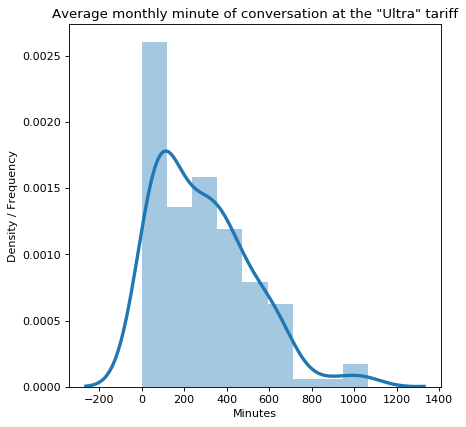

In [ ]:
plt.figure(figsize=(6, 6), dpi=80)

sns.distplot((df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'duration', aggfunc = 'sum')['duration'] / 12),
             hist = True, kde = True, kde_kws = {'linewidth': 3})

plt.title('Average monthly minute of conversation at the "Ultra" tariff')
plt.xlabel('Minutes')
plt.ylabel('Density / Frequency')
plt.show()

In [ ]:
(df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'duration', aggfunc = 'sum')['duration'] / 12).describe()

count     149.000000
mean      288.873602
std       224.830842
min         0.000000
25%        95.250000
50%       264.583333
75%       414.583333
max      1066.166667
Name: duration, dtype: float64

In [ ]:
display('Дисперсия равна:', np.var((df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'duration', aggfunc = 'sum')['duration'] / 12)))

'Дисперсия равна:'

50209.653206937626

Посчитаем значение 3σ:

In [ ]:
display('3σ равно:', (df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'duration', aggfunc = 'sum')['duration'] / 12).describe()['std'] * 3)

'3σ равно:'

674.492526707659

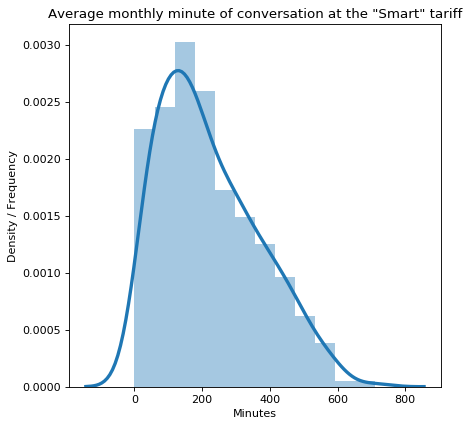

In [ ]:
plt.figure(figsize=(6, 6), dpi=80)

sns.distplot((df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'duration', aggfunc = 'sum')['duration'] / 12),
             hist = True, kde = True, kde_kws = {'linewidth': 3})

plt.title('Average monthly minute of conversation at the "Smart" tariff')
plt.xlabel('Minutes')
plt.ylabel('Density / Frequency')
plt.show()

In [ ]:
(df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'duration', aggfunc = 'sum')['duration'] / 12).describe()

count    351.000000
mean     221.160256
std      145.910274
min        0.000000
25%      106.291667
50%      191.333333
75%      317.333333
max      711.916667
Name: duration, dtype: float64

In [ ]:
display('Дисперсия равна:', np.var((df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'duration', aggfunc = 'sum')['duration'] / 12)))

'Дисперсия равна:'

21229.153310443908

Посчитаем значение 3σ:

In [ ]:
display('3σ равно:', (df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'duration', aggfunc = 'sum')['duration'] / 12).describe()['std'] * 3)

'3σ равно:'

437.7308217474437

### Изучение интернет - трафика

Выясним, какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Для этого посчитаем средний объем трафика, дисперсию и стандартное отклонение.  
Построим гистограммы плотности распределения и применим метод describe:

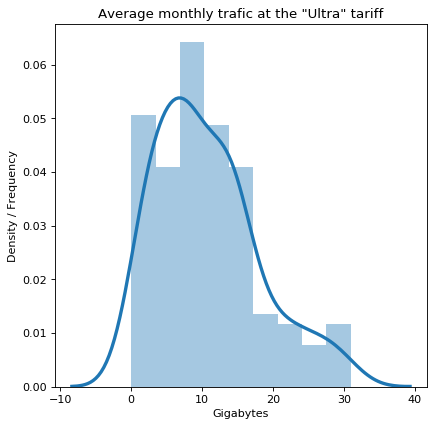

In [ ]:
plt.figure(figsize=(6, 6), dpi=80)

sns.distplot((df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'gb_used', aggfunc = 'sum')['gb_used'] / 12),
             hist = True, kde = True, kde_kws = {'linewidth': 3})

plt.title('Average monthly trafic at the "Ultra" tariff')
plt.xlabel('Gigabytes')
plt.ylabel('Density / Frequency')
plt.show()

In [ ]:
(df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'gb_used', aggfunc = 'sum')['gb_used'] / 12).describe()

count    149.000000
mean      10.739374
std        7.261700
min        0.000000
25%        5.000000
50%        9.166667
75%       14.666667
max       31.000000
Name: gb_used, dtype: float64

In [ ]:
display('Дисперсия равна:', np.var((df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'gb_used', aggfunc = 'sum')['gb_used'] / 12)))

'Дисперсия равна:'

52.37838260538815

Посчитаем значение 3σ:

In [ ]:
display('3σ равно:', (df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'gb_used', aggfunc = 'sum')['gb_used'] / 12).describe()['std'] * 3)

'3σ равно:'

21.785100765516

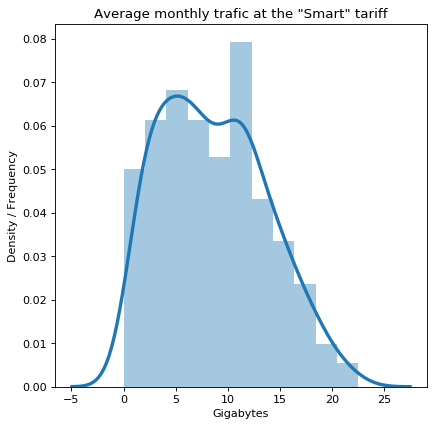

In [ ]:
plt.figure(figsize=(6, 6), dpi=80)

sns.distplot((df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'gb_used', aggfunc = 'sum')['gb_used'] / 12),
             hist = True, kde = True, kde_kws = {'linewidth': 3})

plt.title('Average monthly trafic at the "Smart" tariff')
plt.xlabel('Gigabytes')
plt.ylabel('Density / Frequency')
plt.show()

In [ ]:
(df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'gb_used', aggfunc = 'sum')['gb_used'] / 12).describe()

count    351.000000
mean       8.641263
std        5.039330
min        0.000000
25%        4.333333
50%        8.250000
75%       12.041667
max       22.500000
Name: gb_used, dtype: float64

In [ ]:
display('Дисперсия равна:', np.var((df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'gb_used', aggfunc = 'sum')['gb_used'] / 12)))

'Дисперсия равна:'

25.322498847862885

Посчитаем значение 3σ:

In [ ]:
display('3σ равно:', (df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'gb_used', aggfunc = 'sum')['gb_used'] / 12).describe()['std'] * 3)

'3σ равно:'

15.11799059402868

### Изучение сообщений

Выясним, сколько сообщений отправляют пользователи каждого тарифа в месяц. Для этого посчитаем среднее количество сообщений, дисперсию и стандартное отклонение.  
Построим гистограммы плотности распределения и применим метод describe:

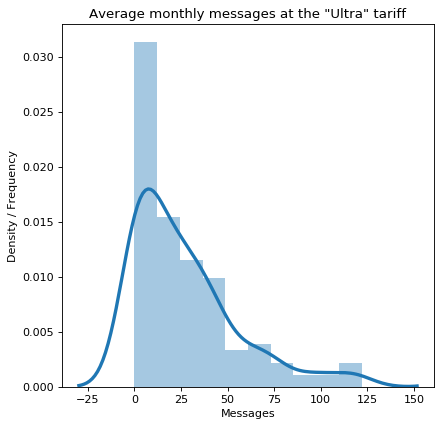

In [ ]:
plt.figure(figsize=(6, 6), dpi=80)

sns.distplot((df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'message_count', aggfunc = 'sum')['message_count'] / 12),
             hist = True, kde = True, kde_kws = {'linewidth': 3})

plt.title('Average monthly messages at the "Ultra" tariff')
plt.xlabel('Messages')
plt.ylabel('Density / Frequency')
plt.show()

In [ ]:
(df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'message_count', aggfunc = 'sum')['message_count'] / 12).describe()

count    149.000000
mean      27.039150
std       28.231721
min        0.000000
25%        4.000000
50%       19.500000
75%       38.333333
max      121.916667
Name: message_count, dtype: float64

In [ ]:
display('Дисперсия равна:', np.var((df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'message_count', aggfunc = 'sum')['message_count'] / 12)))

'Дисперсия равна:'

791.6808871222017

Посчитаем значение 3σ:

In [ ]:
display('3σ равно:', (df_united[df_united['tariff'] == 'ultra'].pivot_table(index = 'user_id', values = 'message_count', aggfunc = 'sum')['message_count'] / 12).describe()['std'] * 3)

'3σ равно:'

84.69516362077081

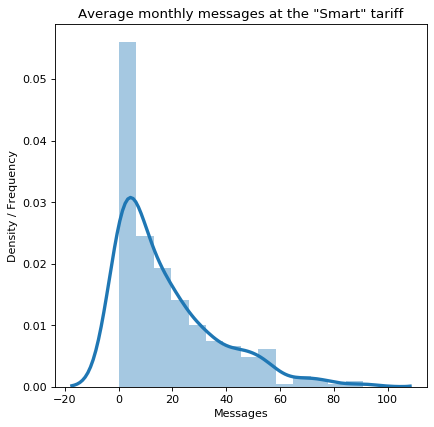

In [ ]:
plt.figure(figsize=(6, 6), dpi=80)

sns.distplot((df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'message_count', aggfunc = 'sum')['message_count'] / 12),
             hist = True, kde = True, kde_kws = {'linewidth': 3})

plt.title('Average monthly messages at the "Smart" tariff')
plt.xlabel('Messages')
plt.ylabel('Density / Frequency')
plt.show()

In [ ]:
(df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'message_count', aggfunc = 'sum')['message_count'] / 12).describe()

count    351.000000
mean      17.666667
std       18.605024
min        0.000000
25%        3.208333
50%       11.500000
75%       27.000000
max       91.000000
Name: message_count, dtype: float64

In [ ]:
display('Дисперсия равна:', np.var((df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'message_count', aggfunc = 'sum')['message_count'] / 12)))

'Дисперсия равна:'

345.1607312440646

Посчитаем значение 3σ:

In [ ]:
display('3σ равно:', (df_united[df_united['tariff'] == 'smart'].pivot_table(index = 'user_id', values = 'message_count', aggfunc = 'sum')['message_count'] / 12).describe()['std'] * 3)

'3σ равно:'

55.81507092942857

### Результаты и вывод

**Тариф "Ультра"**  
Распределение по звонкам, трафику и сообщениям близко к нормальному распределению со скошенностью вправо. Пользователям тарифа в месяц требуется в среднем 273 ± 637 минут разговора, дисперсия 44756, 11 ± 22 гигабайт трафика, дисперсия 52, и 27 ± 85 сообщений, дисперсия 792.  
**Тариф "Смарт"**  
Распределение по звонкам, трафику и сообщениям близко к нормальному распределению со скошенностью вправо. Пользователям тарифа в месяц требуется в среднем 209 ± 414 минут разговора, дисперсия 18950, 9 ± 15 гигабайт трафика, дисперсия 25, и 18 ± 56 сообщений, дисперсия 345.  

Пользователям тарифа "Ультра" в месяц требуется больше минут разговора, интернет-трафика и сообщений, чем пользователям тарифа "Смарт".

## Проверка гипотез

Для завершения исследования нам нужно ответить на два вопроса: различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт» и отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов?  
Для ответа на первый вопрос сформулируем следующие гипотезы:

H0: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны;  
H1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Отфильтруем таблицу df_united по тарифу:

In [ ]:
df_united_ultra = df_united[df_united['tariff'] == 'ultra'] # фильтрация таблицы по тарифу Ультра

In [ ]:
df_united_smart = df_united[df_united['tariff'] == 'smart'] # фильтрация таблицы по тарифу Смарт

Зададим уровень значимости равный 1%:

In [ ]:
alpha = 0.01

Проведем t-тест (критерий Стьюдента) для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

In [ ]:
results = st.ttest_ind(df_united_ultra['sumprice'], df_united_smart['sumprice'], equal_var = True) # t-тест

Проверяем нулевую и альтернативнуюгипотезы и выводмим результаты на экран:

In [ ]:
display('р-значение:', results.pvalue)
if results.pvalue < alpha: 
    display('Отвергаем нулевую гипотезу!')
else:
    display('Данные не противоречат нулевой гипотезе')

'р-значение:'

9.59472004286221e-160

'Отвергаем нулевую гипотезу!'

Результаты противоречат нулевой гипотезе и не противоречат первой гипотезе при уровне значимости 0,01. Мы можем предполагать, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Дополнительно ответим еще на один вопрос: больше ли средняя выручка тарифа «Ультра», чем средняя выручка тарифа «Смарт»?
Сформулируем гипотезы:  
H0: Средняя выручка тарифа «Ультра» не больше средней выручки тарифа «Смарт».  
H1: Средняя выручка тарифа «Ультра» больше средней выручки тарифа «Смарт».

Проверяем нулевую и альтернативнуюгипотезы и выводмим результаты на экран:

In [ ]:
display('р-значение:', results.pvalue / 2)
if (results.pvalue / 2 < alpha) and (df_united_ultra['sumprice'].mean() > df_united_smart['sumprice'].mean()): 
    display('Отвергаем нулевую гипотезу!')
else:
    display('Данные не противоречат нулевой гипотезе')

'р-значение:'

4.797360021431105e-160

'Отвергаем нулевую гипотезу!'

Результаты противоречат нулевой гипотезе и не противоречат альтернативной гипотезе при уровне значимости 0,01. Мы можем предполагать, что средняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт».

Для ответа на следующий вопрос сформулируем гипотезы:

H0: Средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов;  
H1: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Отфильтруем таблицу df_united по городам:

In [ ]:
df_united_moscow = df_united[df_united['city'] == 'москва'] # фильтрация таблицы по городу Москва

In [ ]:
df_united_region = df_united[df_united['city'] != 'москва'] # фильтрация таблицы по другим городам

Зададим уровень значимости равный 1%:

In [ ]:
alpha2 = 0.01

Проведем t-тест (критерий Стьюдента) для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

In [ ]:
results2 = st.ttest_ind(df_united_moscow['sumprice'], df_united_region['sumprice'], equal_var = True)

Проверяем нулевую и альтернативнуюгипотезы и выводмим результаты на экран:

In [ ]:
display('р-значение:', results2.pvalue)
if results2.pvalue < alpha2: 
    display('Отвергаем нулевую гипотезу!')
else:
    display('Данные не противоречат нулевой гипотезе')

'р-значение:'

0.5419594081335117

'Данные не противоречат нулевой гипотезе'

Результаты не противоречат нулевой гипотезе и противоречат альтернативной гипотезе при уровне значимости 0,01. Мы можем предполагать, что средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.

## Вывод

При проведении исследования мы выяснили:

1. Пользователям тарифа "Ультра" в месяц требуется больше минут разговора, интернет-трафика и сообщений, чем пользователям тарифа "Смарт".  
2. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.  
3. Средняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт».  
4. Средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.

На основании результатов исследования мы делаем вывод:

**Тариф "Ультра" приносит больше денег оператору "Мегалайн" независимо от региона.**